In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_excel("Mall_Customers.xlsx")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Spending score on the basis of annual income')

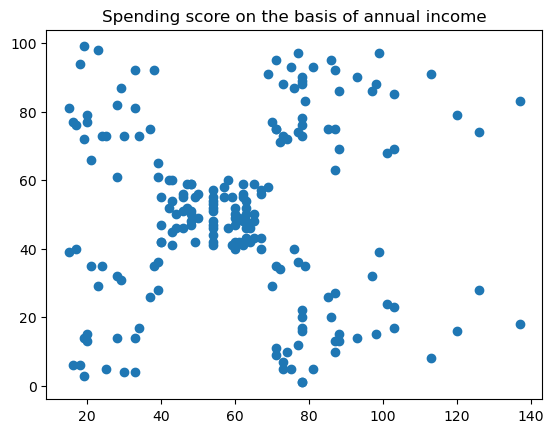

In [7]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.title("Spending score on the basis of annual income")

Text(0.5, 1.0, 'Spending score on the basis of age')

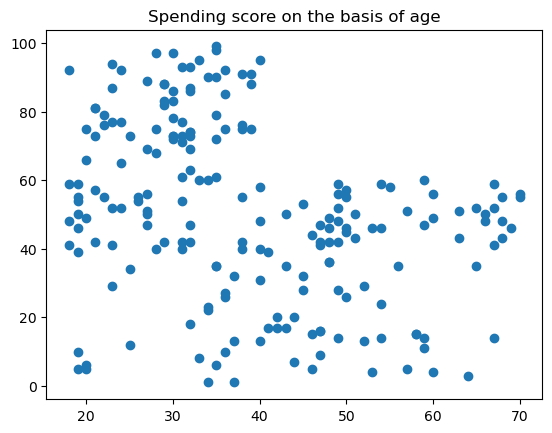

In [9]:
plt.scatter(df.Age,df['Spending Score (1-100)'])
plt.title("Spending score on the basis of age")

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
    wcss.append(km.inertia_)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [15]:
wcss

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 82637.6660919113,
 58302.40630860368,
 51527.73675738675,
 51019.20756308507,
 41211.873219816014,
 38125.87431333035]

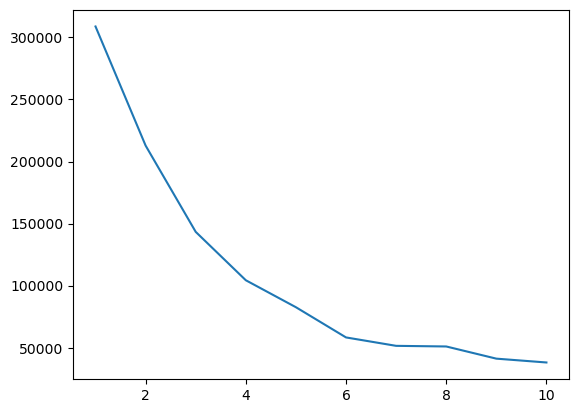

In [17]:
plt.plot(range(1,11),wcss)

In [19]:
km = KMeans(n_clusters=6)
y_predicts = km.fit_predict(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
y_predicts


array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2])

In [23]:
df['cluster']=y_predicts
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


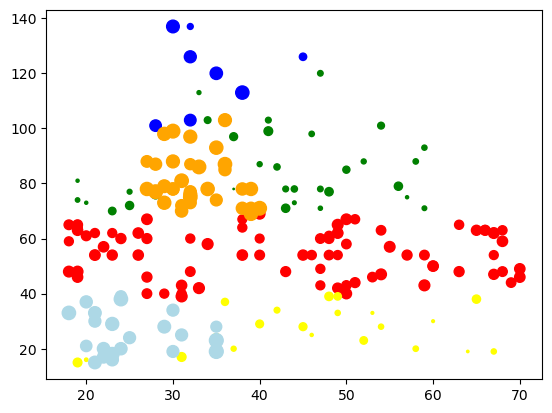

In [25]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
df6=df[df.cluster==5]
plt.scatter(df1['Age'],df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Age'],df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='orange')
plt.scatter(df5['Age'],df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow')
plt.scatter(df6['Age'],df6['Annual Income (k$)'],df6['Spending Score (1-100)'],color='lightblue')


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['Annual Income (k$)']=scaler.fit_transform(df[['Annual Income (k$)']])
df['Age']=scaler.fit_transform(df[['Age']])
df['Spending Score (1-100)']=scaler.fit_transform(df[['Spending Score (1-100)']])

In [29]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,0.019231,0.000000,0.387755,4
1,2,Male,0.057692,0.000000,0.816327,5
2,3,Female,0.038462,0.008197,0.051020,4
3,4,Female,0.096154,0.008197,0.775510,5
4,5,Female,0.250000,0.016393,0.397959,4
...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,2
196,197,Female,0.519231,0.909836,0.275510,2
197,198,Male,0.269231,0.909836,0.744898,2
198,199,Male,0.269231,1.000000,0.173469,2


In [31]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])
    wcss.append(km.inertia_)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [75]:
wcss

[23.040720326039906,
 13.993505283127977,
 9.058985215159453,
 6.121856618850359,
 3.5834407128859733,
 3.2243666168898626,
 2.7038351609947107,
 2.3420558025700666,
 2.254101689267581,
 1.8403492489995599]

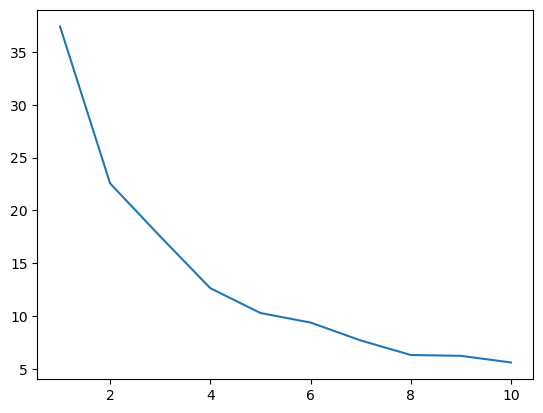

In [33]:
plt.plot(range(1,11),wcss)

In [45]:
km = KMeans(n_clusters=2)
y_predicts = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
y_predicts

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [49]:
km.cluster_centers_

array([[0.36322991, 0.67271041],
       [0.38908487, 0.24063549]])

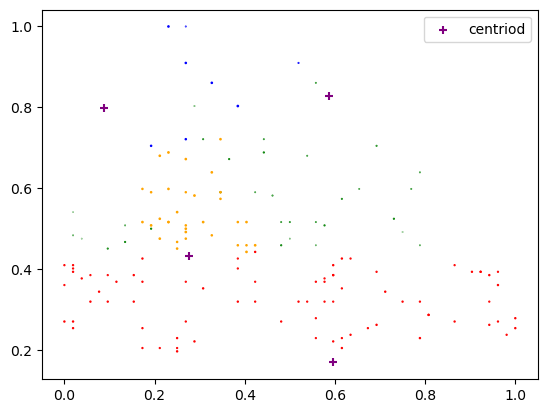

In [43]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
#df5=df[df.cluster==4]
plt.scatter(df1['Age'],df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Age'],df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='orange')
#plt.scatter(df5['Age'],df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow')
#plt.scatter(df6['Age'],df6['Annual Income (k$)'],df6['Spending Score (1-100)'],color='lightblue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="+",label="centriod")
plt.legend()
